<a href="https://colab.research.google.com/github/emm-gl/Referenz/blob/master/cont_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import pyarrow.parquet as pq

from google.colab import data_table

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###The labels of interest are:
TEMPERATUR INNEN_IST
DRUCK INNEN_IST


Configs:
        "89": {
            "rate": "diff",
            "source": {
                "name": "datablock",
                "address": 400,
                "dataBlockNumber": 10
            },
            "dataType": {
                "name": "int16"
            },
            "dataClass": "discrete",
            "identifier": "DB10.DBW400",
            "dataBlockNumber": 10
        },
        "90": {
            "rate": "diff",
            "source": {
                "name": "datablock",
                "address": 402,
                "dataBlockNumber": 10
            },
            "dataType": {
                "name": "int16"
            },
            "dataClass": "discrete",
            "identifier": "DB10.DBW402",
            "dataBlockNumber": 10
        },

##Loading data:


####Get the config file:

In [18]:
# Specify the path of JSON file in Google Drive
json_file_path = "/content/drive/My Drive/continental_challenge/ct-oesl-hiring-challenge-main/data/config/datapoints.json"

# Load the JSON file into a DataFrame
df_config = pd.read_json(json_file_path)

# Display the DataFrame
df_config

,uuid,label,config
0,00f9c223-6fd4-45ec-8ee2-62b9458c98fc,BETRIEBSINTERNE AUFTRAGSNUMMER,"{'rate': 'diff', 'source': {'name': 'datablock..."
1,9d7f979a-c50e-494c-9ee0-082eabe3143f,SAP BEZEICHNUNG,"{'rate': 'diff', 'source': {'name': 'datablock..."
2,8a1c7509-3c14-4f8f-b81c-0d44190ea305,ARTIKELNUMMER,"{'rate': 'diff', 'source': {'name': 'datablock..."
3,6a295488-d312-4c35-9c35-7347488f9846,AUFTRAGSMENGE_SOLL,"{'rate': 'diff', 'source': {'name': 'datablock..."
4,5cbb4233-dcbb-4e96-9111-0f0c36633303,AUFTRAGSMENGE_IST,"{'rate': 'diff', 'source': {'name': 'datablock..."
...,...,...,...
315,13e090fc-7683-4c8b-863f-0816dce05f55,DATEN.MIN_SOLLTEMP,"{'rate': 'diff', 'source': {'name': 'datablock..."
316,c053ad11-d895-4d7a-b02a-aa95f80b6618,DATEN.ISTDRUCK,"{'rate': 'diff', 'source': {'name': 'datablock..."
317,df83a9c8-aac7-4331-b6b5-a36d8d5c8c7d,ANALOGE_ISTWERTE.IST_TEMPERATUR.ISTWERT_INT,"{'rate': 'diff', 'source': {'name': 'datablock..."
318,2af6484d-a002-4404-ba05-30b960e8a9ba,ANALOGE_ISTWERTE.PEW_518.ISTWERT_INT,"{'rate': 'diff', 'source': {'name': 'datablock..."


No charts were generated by quickchart



According the config File:

89. TEMPERATUR INNEN_IST    
    UUID: 5cde150d-c044-4e55-8c48-73321e0c0f27     
    Data type: INT16

90. DRUCK INNEN_IST      
    UUID: 67da707a-735b-497d-9870-40349919814c     
    Data type: INT16

---

In [4]:
# Function to search for files with a certain name pattern in a directory and its subdirectories


def find_files(file_name_pattern):
    root_dir = root_directory
    matched_files = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.parquet') and file_name_pattern in file:
                matched_files.append(os.path.join(root, file))
    return matched_files

In [6]:
#Extraction of timeseries data for actual temperature

# Define the pattern of the file name you want to search for
file_name_pattern_temperatur = "5cde150d-c044-4e55-8c48-73321e0c0f27"

parquet_files = find_files(file_name_pattern_temperatur)

# Create an empty DataFrame to store the combined data from all Parquet files
df_temperature = pd.DataFrame()

# Read each Parquet file and extract its content into the combined DataFrame
for file_path in parquet_files:
    parquet_data = pq.read_table(file_path).to_pandas()
    df_temperature = pd.concat([df_temperature, parquet_data], ignore_index=True)


In [7]:
df_temperature

,uuid,sequence_number,systime,plctime,is_delta,value_integer,value_string,value_double,value_bool,value_bytes
0,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712620800318265586,1712627999115000000,True,145,None,NaN,None,None
1,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712620800440277299,1712627999238000000,True,144,None,NaN,None,None
2,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712620800688215328,1712627999485000000,True,145,None,NaN,None,None
3,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712620800814216485,1712627999612000000,True,144,None,NaN,None,None
4,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712620801490258391,1712628000288000000,True,145,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...
412764,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712757595523063179,1712764794973000000,False,123,None,NaN,None,None
412765,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712757596524982895,1712764795976000000,False,123,None,NaN,None,None
412766,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712757597525014776,1712764796975000000,False,123,None,NaN,None,None
412767,5cde150d-c044-4e55-8c48-73321e0c0f27,0,1712757598525027229,1712764797975000000,False,123,None,NaN,None,None


In [8]:
from datetime import datetime

# Convert nanoseconds to seconds by dividing by 1e9
timestamp_seconds = 1712620800318265586 / 1e9

# Convert timestamp to datetime format
datetime_format = datetime.utcfromtimestamp(timestamp_seconds)

# Print the datetime
print(datetime_format)


2024-04-09 00:00:00.318266


In [9]:
#Extraction of timeseries data for actual pressure (DRUCK INNEN_IST)

# Define the pattern of the file name you want to search for
file_name_druck = '67da707a-735b-497d-9870-40349919814c'

parquet_files = find_files(file_name_druck)

# Create an empty DataFrame to store the combined data from all Parquet files
df_druck = pd.DataFrame()

# Read each Parquet file and extract its content into the combined DataFrame
for file_path in parquet_files:
    parquet_data = pq.read_table(file_path).to_pandas()
    df_druck = pd.concat([df_druck, parquet_data], ignore_index=True)

In [10]:
df_druck

,uuid,sequence_number,systime,plctime,is_delta,value_integer,value_string,value_double,value_bool,value_bytes
0,67da707a-735b-497d-9870-40349919814c,0,1712620800580196435,1712627999377000000,False,3,None,NaN,None,None
1,67da707a-735b-497d-9870-40349919814c,0,1712620801584247781,1712628000381000000,False,3,None,NaN,None,None
2,67da707a-735b-497d-9870-40349919814c,0,1712620802584316227,1712628001379000000,False,3,None,NaN,None,None
3,67da707a-735b-497d-9870-40349919814c,0,1712620803586239416,1712628002382000000,False,3,None,NaN,None,None
4,67da707a-735b-497d-9870-40349919814c,0,1712620804586264960,1712628003382000000,False,3,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...
206351,67da707a-735b-497d-9870-40349919814c,0,1712757595715028437,1712764795165000000,False,0,None,NaN,None,None
206352,67da707a-735b-497d-9870-40349919814c,0,1712757596714994283,1712764796165000000,False,0,None,NaN,None,None
206353,67da707a-735b-497d-9870-40349919814c,0,1712757597716989718,1712764797168000000,False,0,None,NaN,None,None
206354,67da707a-735b-497d-9870-40349919814c,0,1712757598716958683,1712764798167000000,False,0,None,NaN,None,None


To do's:
Revisar que no haya valores nulos, Nan, en los valores de integer
Sacar estadística descriptiva para los value integer para analizar



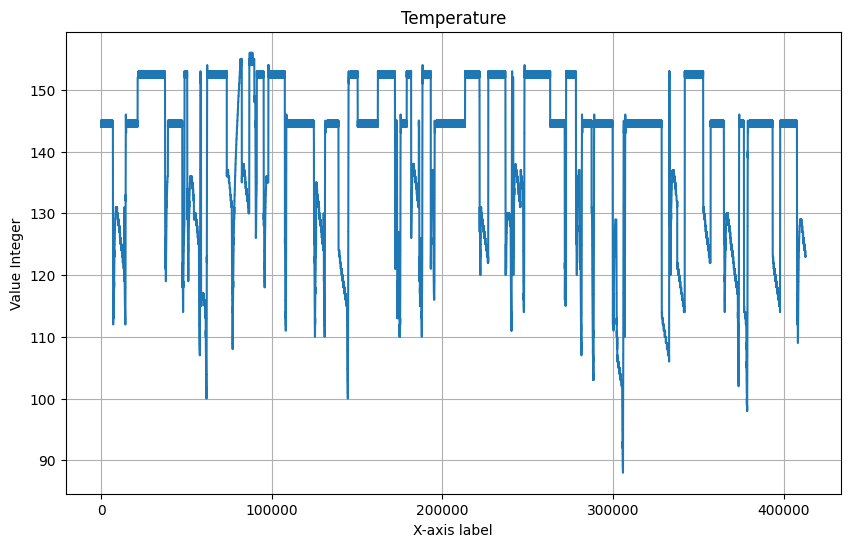

In [11]:
#Plot temperature:

%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the Parquet file into a DataFrame 'df'
# If not, replace 'df' with your DataFrame variable

# Plot a certain column
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df_temperature['value_integer'])  # Replace 'column_name' with the name of the column you want to plot
plt.xlabel('X-axis label')    # Add label for x-axis
plt.ylabel('Value Integer')    # Add label for y-axis
plt.title('Temperature')# Add title to the plot
plt.grid(True)                # Add gridlines
plt.show()                    # Show the plot


In [12]:
#Extraction of timeseries data for actual pressure (DRUCK INNEN_IST)

# Define the pattern of the file name you want to search for
file_name_pattern_druck = '67da707a-735b-497d-9870-40349919814c'

parquet_files = find_files(root_directory, file_name_pattern_druck)

# Create an empty DataFrame to store the combined data from all Parquet files
df_druck = pd.DataFrame()

# Read each Parquet file and extract its content into the combined DataFrame
for file_path in parquet_files:
    parquet_data = pq.read_table(file_path).to_pandas()
    df_druck = pd.concat([df_druck, parquet_data], ignore_index=True)

TypeError: find_files() takes 1 positional argument but 2 were given

In [ ]:
df_druck

In [ ]:
#Plot Druck:

%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the Parquet file into a DataFrame 'df'
# If not, replace 'df' with your DataFrame variable

# Plot a certain column
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df_druck['value_integer'])  # Replace 'column_name' with the name of the column you want to plot
plt.xlabel('X-axis label')    # Add label for x-axis
plt.ylabel('Value Integer')    # Add label for y-axis
plt.title('Druck')# Add title to the plot
plt.grid(True)                # Add gridlines
plt.show()                    # Show the plot